In [13]:
import tensorflow as tf
from keras import datasets,layers ,models
from keras.utils import to_categorical
import numpy as np
import keras
from keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from keras.layers import GlobalMaxPooling2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.models import Model
import matplotlib.pyplot as plt


In [36]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


In [37]:

print(train_images.shape)
print(test_images.shape)

print(train_labels.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


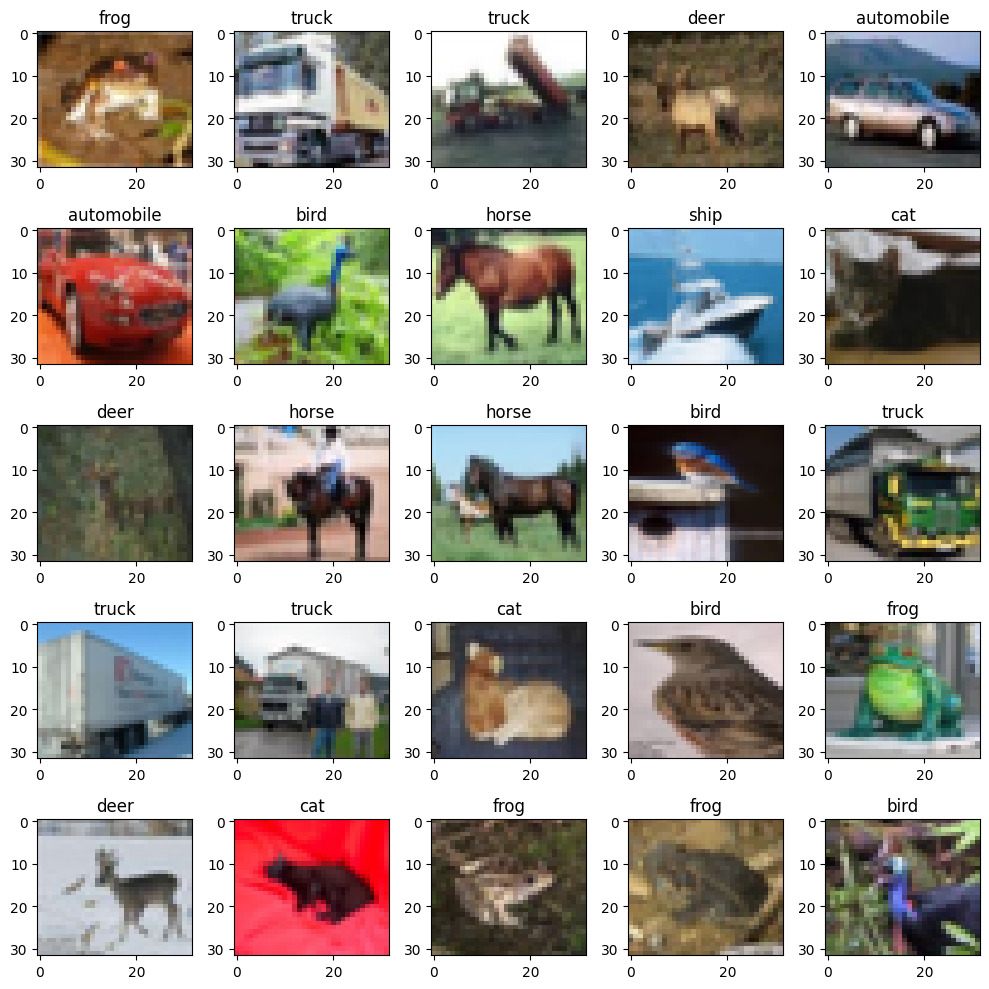

In [38]:


# Define class names for CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Visualize data by plotting images with labels
fig, ax = plt.subplots(5, 5, figsize=(10, 10))
k = 0

for i in range(5):
    for j in range(5):
        ax[i][j].imshow(train_images[k], aspect='auto')
        ax[i][j].set_title(class_names[train_labels[k][0]])  # Set title as class name
        ax[i][j].axis('on')  # Hide axis
        k += 1

plt.tight_layout()
plt.show()


In [39]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


In [40]:
# Flatten the input image dimensions
train_labels, test_labels = train_labels.flatten(), test_labels.flatten()

In [41]:
# number of classes
K = 10

# calculate total number of classes
# for output layer
print("number of classes:", K)

# Build the model using the functional API
# input layer
i = Input(shape=train_images[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

# model description
model.summary()


number of classes: 10
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16,

In [42]:
# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
r = model.fit(
  train_images, train_labels, validation_data=(test_images, test_labels), epochs=2)
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_acc)

# Make predictions
predictions = model.predict(test_images)

Epoch 1/2
1563/1563 [==============================] - 490s 313ms/step - loss: 0.7047 - accuracy: 0.7605 - val_loss: 0.7739 - val_accuracy: 0.7399
Epoch 2/2
313/313 [==============================] - 23s 73ms/step - loss: 0.6653 - accuracy: 0.7771
Test Accuracy: 0.7771000266075134
313/313 [==============================] - 23s 73ms/step
